# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 100 баллов

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
data = pd.read_csv('titanik.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
train = data.sample(frac=0.7,random_state=500)
train = train.reset_index()

Далее выделим `test` часть 

In [5]:
test = data
test = test[~test.isin(train)].dropna(how = 'all')
test = test.reset_index()
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NaN,NaN,"Braund, Mr. Owen Harris",NaN,22.0,1.0,NaN,A/5 21171,7.2500,NaN,NaN
1,2,1.0,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,NaN,PC 17599,71.2833,C85,NaN
2,3,1.0,NaN,"Heikkinen, Miss. Laina",NaN,26.0,NaN,0.0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,NaN,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1.0,0.0,113803,53.1000,C123,NaN
4,5,NaN,NaN,"Allen, Mr. William Henry",male,35.0,NaN,NaN,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
886,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
887,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
888,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [6]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [92]:
train_features, train_target = get_features_and_target(train)
test_features, test_target = get_features_and_target(test)


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [93]:
train_features

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,female,63.0,1,0,77.9583
1,3,male,25.0,0,0,7.0500
2,1,male,24.0,0,0,79.2000
3,3,female,10.0,0,2,24.1500
4,1,female,22.0,0,1,55.0000
...,...,...,...,...,...,...
619,3,male,29.0,0,0,7.8958
620,2,male,31.0,1,1,37.0042
621,3,male,49.0,0,0,0.0000
622,3,male,18.0,1,0,6.4958


Построим несколько графиков зависимости каждого из параметров на выживаемость - так мы поймем какой параметр нужен для решающего дерева высоты 1

А также несколько тепловых карт - для понимания признаков для дерева высоты 2

<AxesSubplot:title={'center':'Зависимость возраста и выживаемости'}, xlabel='Age', ylabel='Survived'>

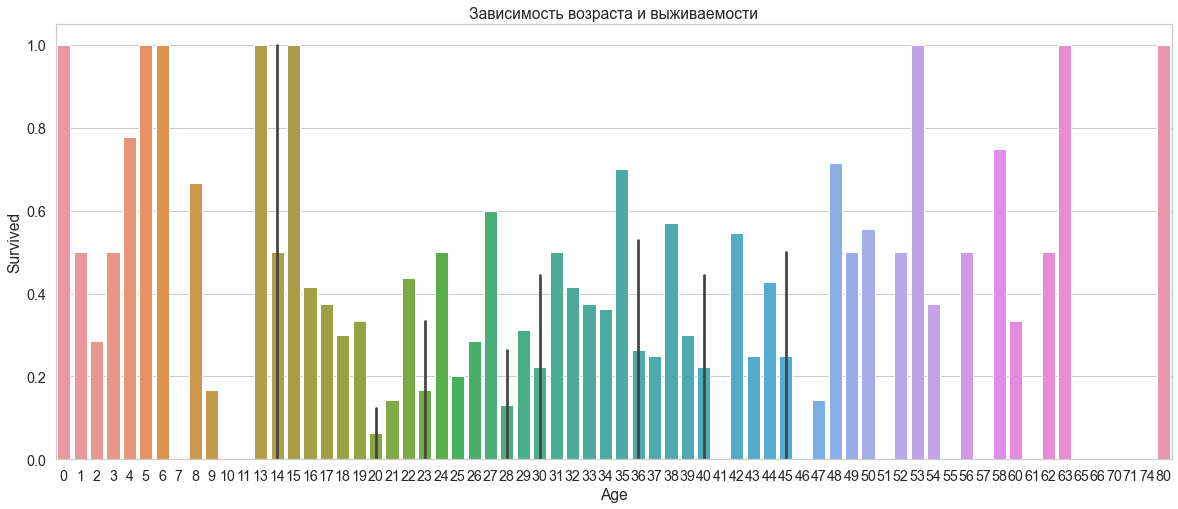

In [22]:
#train_features[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

age = train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
age['Age'] = age['Age'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость возраста и выживаемости")
sns.barplot(data=age, x='Age', y='Survived')


От возраста выживаемость зависит не сильно, какие-то отдельные возраста выжили, общей тенденции на каком-то из промежутков нет

<AxesSubplot:title={'center':'Зависимость пола и выживаемости'}, xlabel='Sex', ylabel='Survived'>

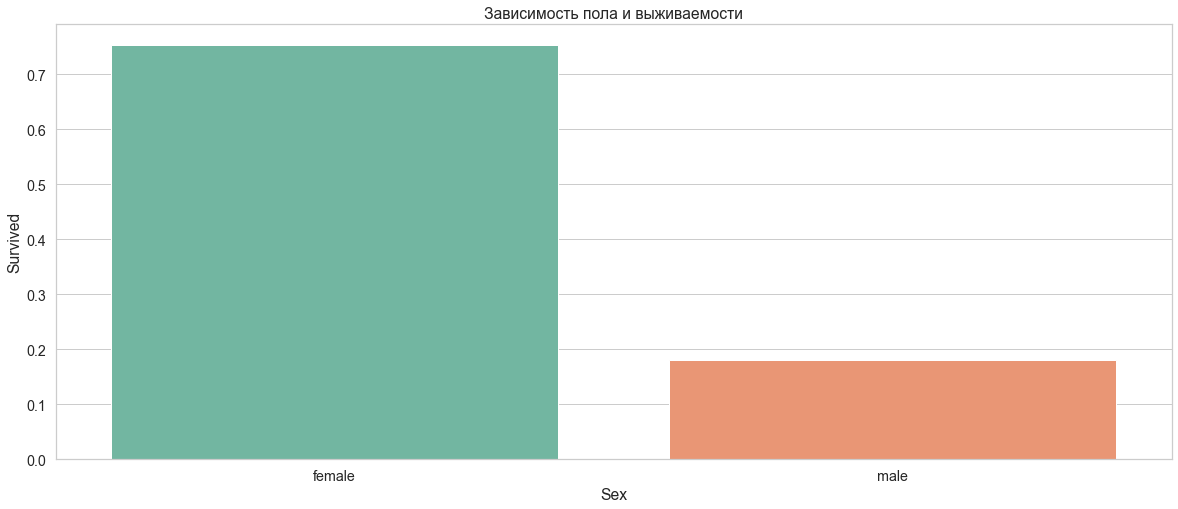

In [24]:
age = train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()
#age['Sex'] = age['Sex'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость пола и выживаемости")
sns.barplot(data=age, x='Sex', y='Survived')

Женщины на титанике намного чаще выживают, чем мужчины

<AxesSubplot:title={'center':'Зависимость  количества братьев, сестер, супругов и выживаемости'}, xlabel='SibSp', ylabel='Survived'>

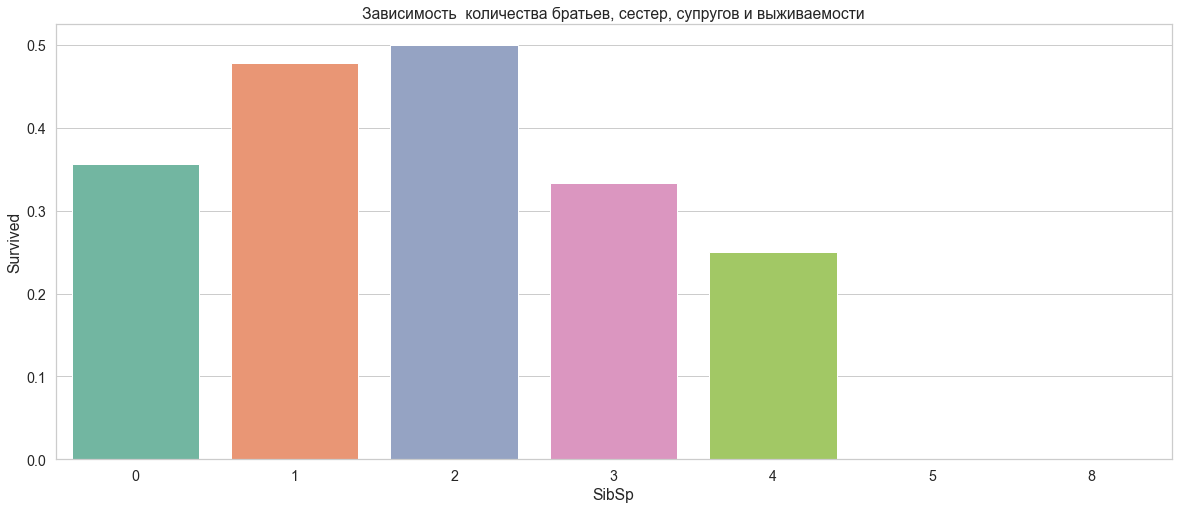

In [31]:
age = train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()
#age['SibSp'] = age['SibSp'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость  количества братьев, сестер, супругов и выживаемости")
sns.barplot(data=age, x='SibSp', y='Survived')

Каждое из значение `SibSp` имеет не большое влияние на выживаемость

<AxesSubplot:title={'center':'Зависимость числа родителей, детей и выживаемости'}, xlabel='Parch', ylabel='Survived'>

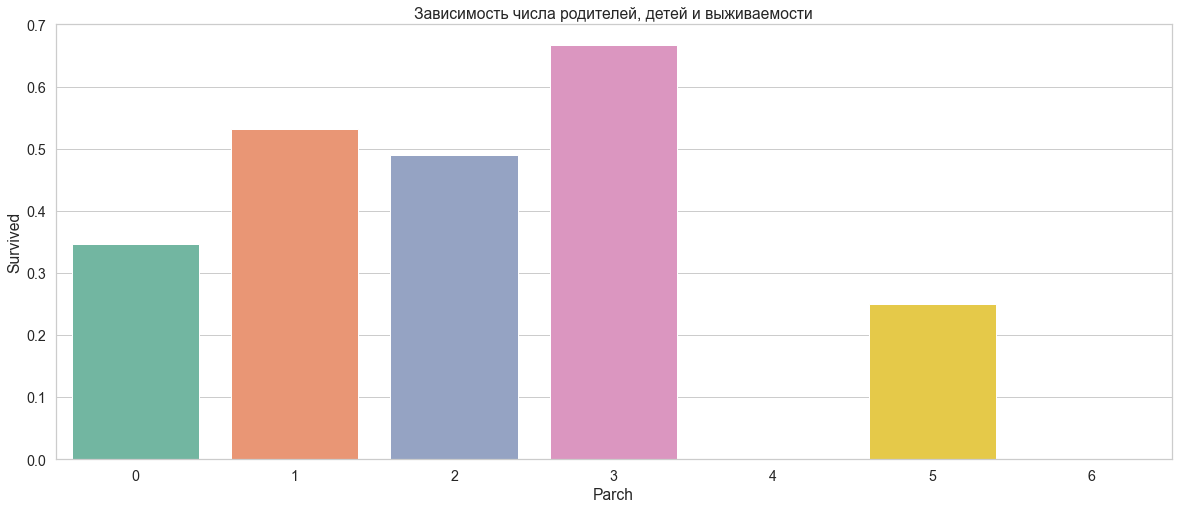

In [32]:
age = train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()
#age['SibSp'] = age['SibSp'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость числа родителей, детей и выживаемости")
sns.barplot(data=age, x='Parch', y='Survived')

<AxesSubplot:title={'center':'Зависимость оплаты и выживаемости'}, xlabel='Fare', ylabel='Survived'>

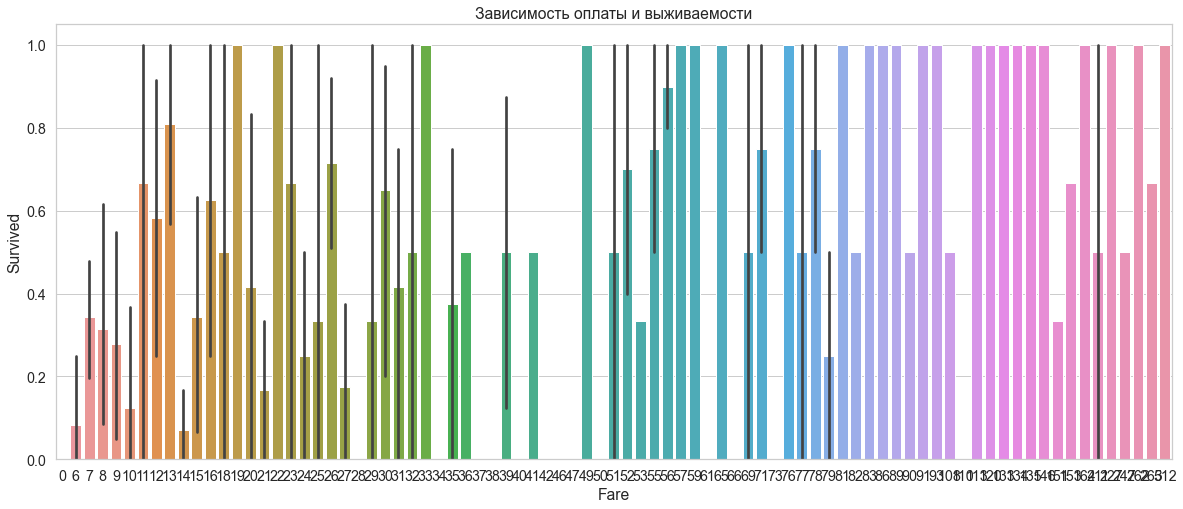

In [34]:
age = train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean()
age['Fare'] = age['Fare'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость оплаты и выживаемости")
sns.barplot(data=age, x='Fare', y='Survived')

Смотреть на оплату плохо, очень много разных значений, посмотрим на среднее, разобьем на несколько классов оплату и перестроим график

In [37]:
train['Fare'].describe()

count    624.000000
mean      31.259434
std       48.509649
min        0.000000
25%        7.925000
50%       14.054150
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [39]:
train['Fare_class'] = train['Fare'].apply(lambda x : int(x / 10))


<AxesSubplot:title={'center':'Зависимость класса оплаты и выживаемости'}, xlabel='Fare_class', ylabel='Survived'>

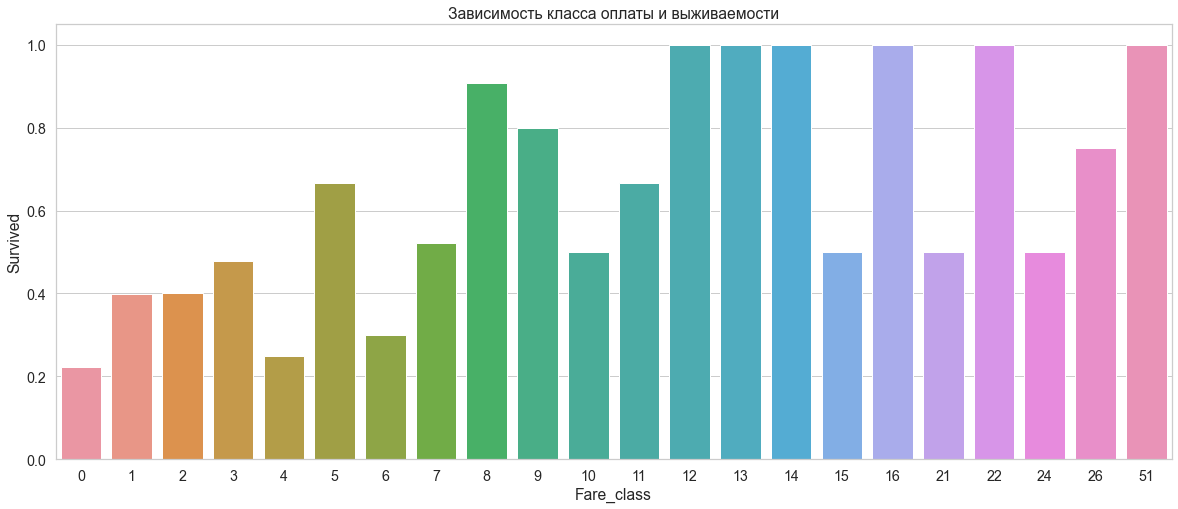

In [41]:
age = train[["Fare_class", "Survived"]].groupby(['Fare_class'], as_index=False).mean()
#age['Fare_class'] = age['Fare_class'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость класса оплаты и выживаемости")
sns.barplot(data=age, x='Fare_class', y='Survived')

Разделив оплату на классы можно сказать, что с 7 класса оплаты большинство выжило

<AxesSubplot:title={'center':'Зависимость класса пассажира и выживаемости'}, xlabel='Pclass', ylabel='Survived'>

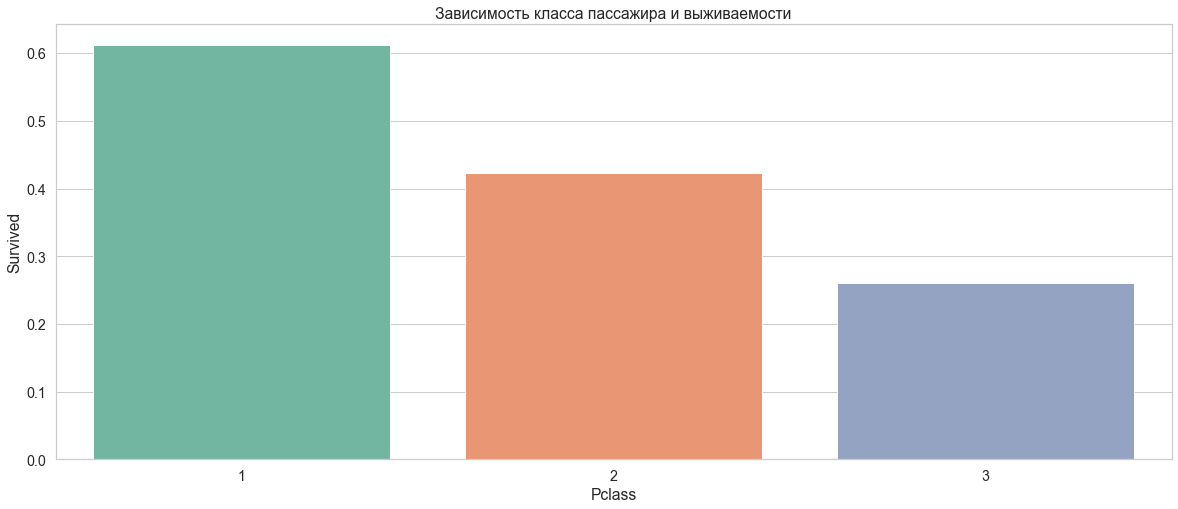

In [189]:
age = train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()
#age['Fare_class'] = age['Fare_class'].apply(lambda x : int(x))
plt.figure(figsize=(20,8))
plt.title("Зависимость класса пассажира и выживаемости")
sns.barplot(data=age, x='Pclass', y='Survived')

Видим, что чем меньше класс пассажира, тем меньше процент выживаемости

In [190]:
table = pd.pivot_table(train, values='Survived', index=['Parch'],
                    columns=['Sex'], aggfunc=np.mean)
table

Sex,female,male
Parch,,
0,0.797101,0.165698
1,0.761905,0.270270
2,0.645161,0.272727
3,0.666667,NaN
4,0.000000,0.000000
5,0.333333,0.000000
6,0.000000,NaN


Text(0.5, 1.0, 'Выживаемость от признаков P и SibSp')

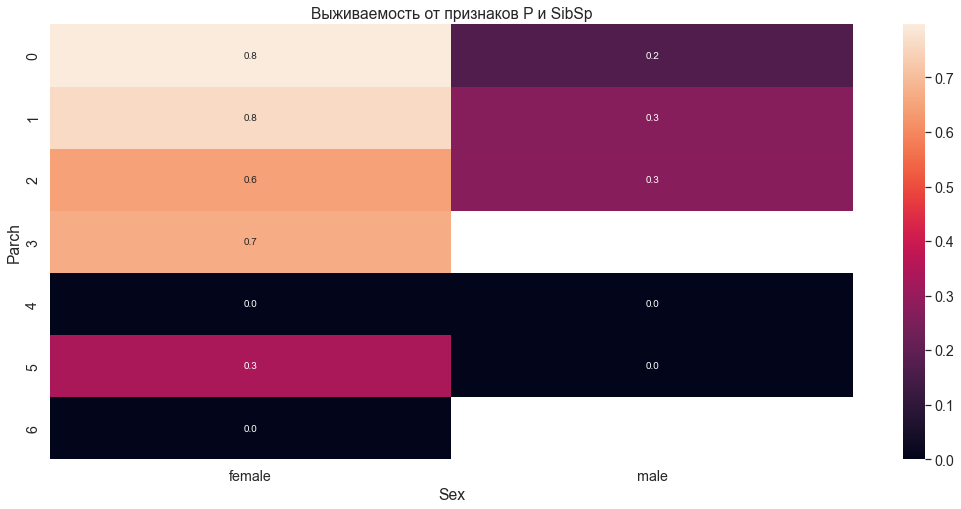

In [191]:
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Parch и Sex')


Среди женщин больше всего выживших имеют параметр Parch до 3 включительно

In [198]:
table = pd.pivot_table(train, values='Survived', index=['Fare_class'],
                    columns=['Sex'], aggfunc=np.mean)
table

Sex,female,male
Fare_class,,
0,0.659574,0.112903
1,0.711864,0.148649
2,0.702703,0.200000
3,0.733333,0.354839
4,0.600000,0.000000
5,1.000000,0.470588
6,0.600000,0.000000
7,1.000000,0.214286
8,1.000000,0.500000


Text(0.5, 1.0, 'Выживаемость от признаков Fare_class и Sex')

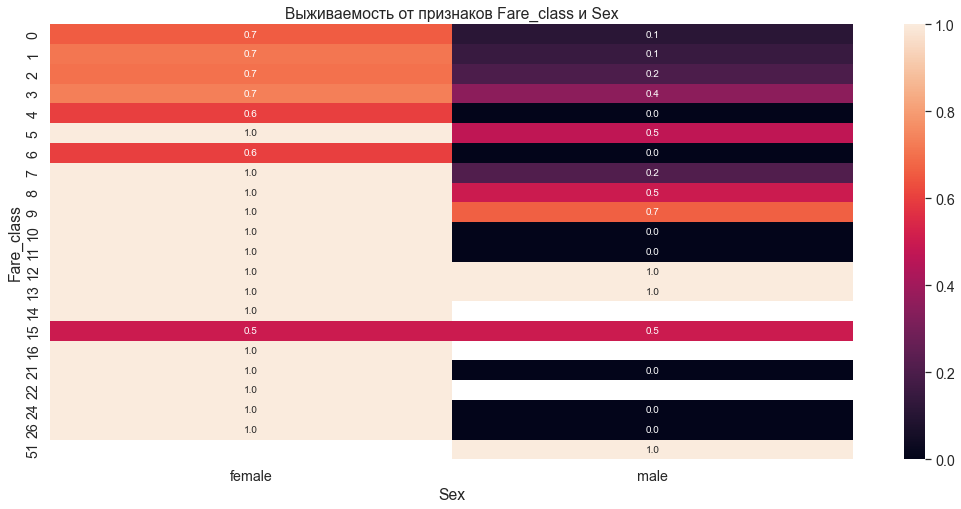

In [199]:
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Fare_class и Sex')


Практически все женщины, класса оплаты 5, 7-14 и 16-26 выжили

In [200]:
table = pd.pivot_table(train, values='Survived', index=['Age'],
                    columns=['Sex'], aggfunc=np.mean)
table

Sex,female,male
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,1.0,NaN
0.83,NaN,1.0
0.92,NaN,1.0
...,...,...
70.00,NaN,0.0
70.50,NaN,0.0
71.00,NaN,0.0


Text(0.5, 1.0, 'Выживаемость от признаков Age и Sex')

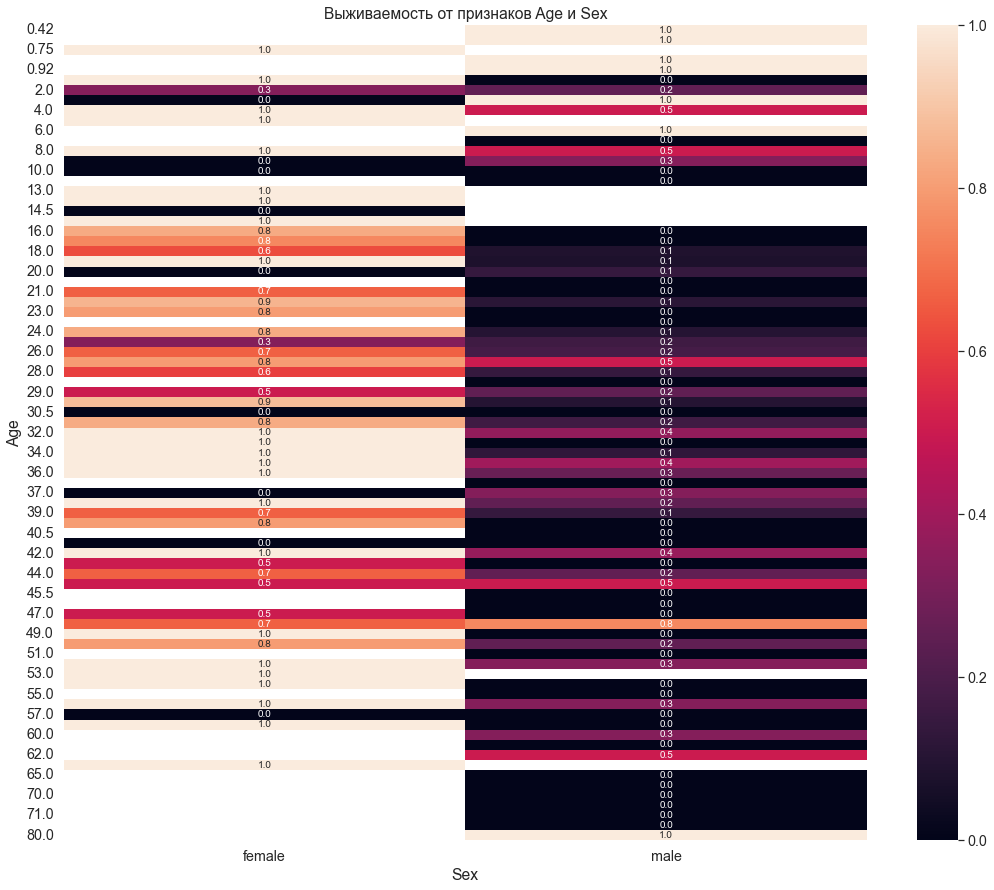

In [201]:
plt.figure(figsize=(18, 15))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Age и Sex')


In [202]:
table = pd.pivot_table(train, values='Survived', index=['Pclass'],
                    columns=['Fare_class'], aggfunc=np.mean)
table

Fare_class,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,21,22,24,26,51
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0.000000,NaN,0.480000,0.520000,0.4,0.636364,0.4,0.666667,0.909091,0.8,...,1.0,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.75,1.0
2,0.000000,0.402597,0.500000,0.666667,0.5,NaN,1.0,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.232143,0.392857,0.225806,0.250000,0.0,0.800000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Выживаемость от признаков Pclass и Fare_class')

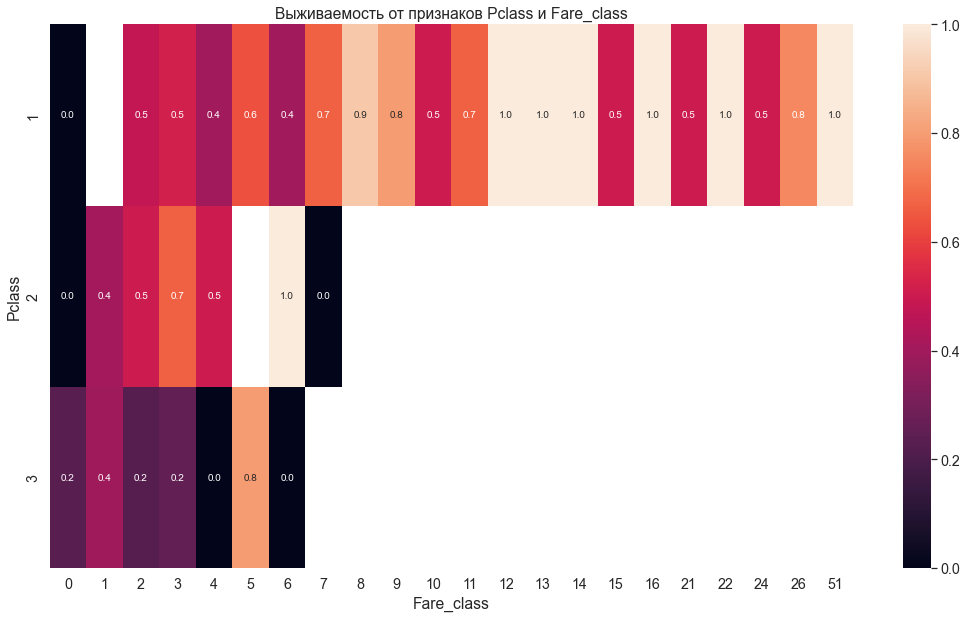

In [204]:
plt.figure(figsize=(18, 10))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Pclass и Fare_class')


На самом деле брать эти признаки не очень правильно, тк класс пассажира напрямую зависит от его оплаты(то есть от класса оплаты)

In [205]:
table = pd.pivot_table(train, values='Survived', index=['Age'],
                    columns=['Fare_class'], aggfunc=np.mean)
table

Fare_class,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,21,22,24,26,51
Age,,,,,,,,,,,,,,,,,,,,,
0.42,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.67,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.83,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Выживаемость от признаков Age и Fare_class')

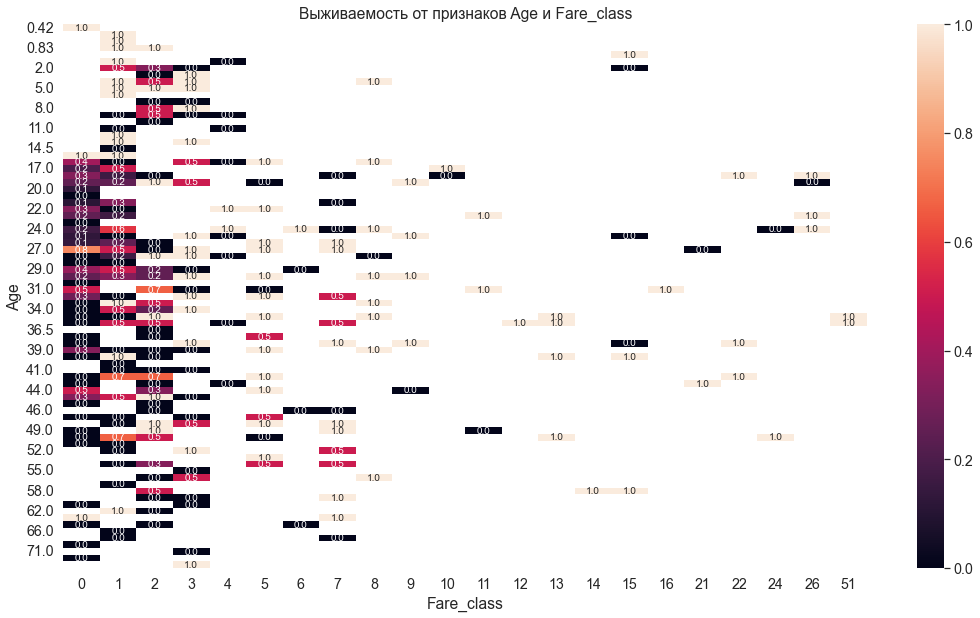

In [207]:
plt.figure(figsize=(18, 10))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Age и Fare_class')


По этому графику сложно понять зависимость между выживаемостью и этими параметрами, можно сказать лишь то, что при увеличении класса оплаты возрастает процент выживаемости

In [209]:
table = pd.pivot_table(train, values='Survived', index=['SibSp'],
                    columns=['Fare_class'], aggfunc=np.mean)
table

Fare_class,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,21,22,24,26,51
SibSp,,,,,,,,,,,,,,,,,,,,,
0,0.225806,0.378947,0.475000,0.500000,0.400000,0.642857,0.666667,0.5,1.0,1.0,...,NaN,1.0,1.0,0.666667,1.0,0.5,1.0,0.5,NaN,1.0
1,0.153846,0.413793,0.394737,0.500000,0.333333,0.666667,0.333333,0.7,0.8,1.0,...,1.0,1.0,NaN,0.333333,NaN,NaN,1.0,NaN,NaN,NaN
2,0.000000,0.500000,1.000000,1.000000,NaN,1.000000,NaN,0.0,NaN,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
3,NaN,1.000000,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN
4,1.000000,NaN,0.000000,0.285714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Выживаемость от признаков SibSp и Parch')

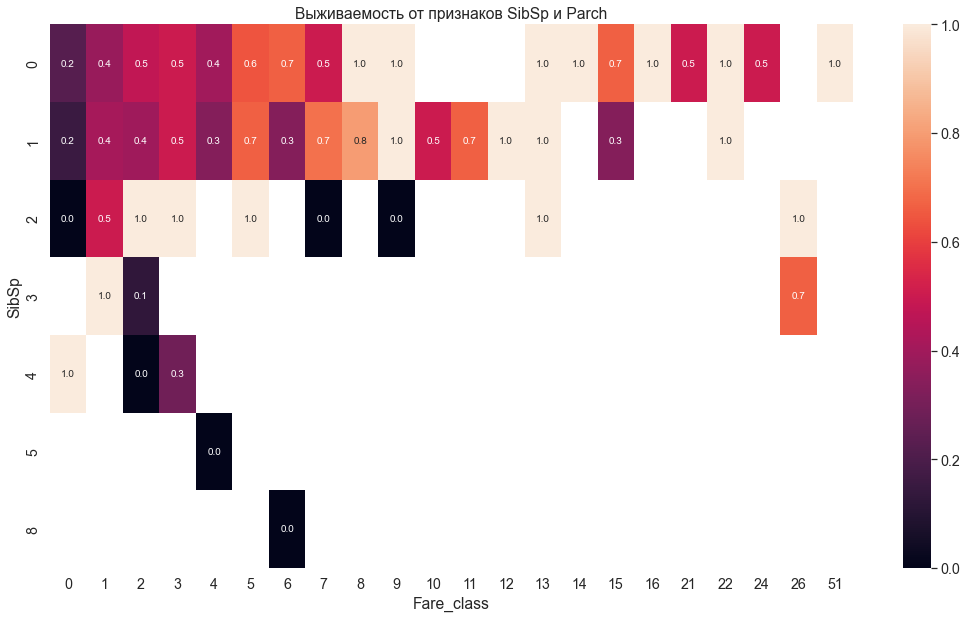

In [212]:
plt.figure(figsize=(18, 10))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков SibSp и Parch')


In [213]:
table = pd.pivot_table(train, values='Survived', index=['Parch'],
                    columns=['SibSp'], aggfunc=np.mean)
table

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,0.318538,0.464286,0.307692,1.000000,NaN,NaN,NaN
1,0.703704,0.527778,0.800000,0.000000,0.0,NaN,NaN
2,0.650000,0.538462,1.000000,0.333333,0.6,0.0,0.0
3,NaN,0.500000,1.000000,NaN,NaN,NaN,NaN
4,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
5,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN
6,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


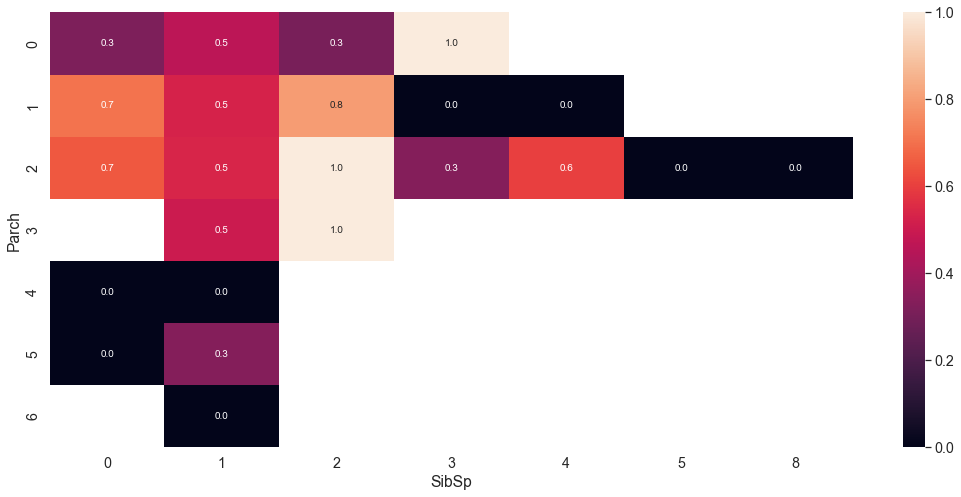

In [214]:
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, fmt=".1f", annot=True)


На этом графике можно определить куски графика, попав в которые человек скорее выживет или не выживет, эти параметры и возьмем для решающего дерева высоты 2

Мы построили много heatmap специально для того, чтобы определить признаки у дерева высоты 2 - использую зависимость `Parch` и `Sibsp`

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков).

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Если `Parch` от 1 до 3 включительно:<br>
    &emsp;Если `SibSp` до 2 включительно:<br>
        &emsp;&emsp;то человек выжил  <br>
    &emsp;Иначе:<br>
        &emsp;&emsp;человек не выжил<br>
Если `Parch` 0:<br>
    &emsp;Если `SibSp` 1 или 3:<br>
        &emsp;&emsp;то человек выжил<br>
    &emsp;Иначе:<br>
        &emsp;&emsp;человек не выжил<br>
Для оставшихся `Parch`:<br>
    &emsp;человек не выжил<br>

**Дерево 2:**

Скажем, что если человек - женщина, то человек скорее выжил, если мужчина, то человек скорее не выжил

Реализуйте полученные деревья по шаблону

In [173]:
def get_res2(x):
    if 1 <= x['Parch'] and x['Parch'] <= 3:
        if x['SibSp'] <= 2:
            x['Survived'] = 1
        else:
            x['Survived'] = 0
    elif x['Parch'] == 0:
        if x['SibSp']  == 1 or x['SibSp'] == 3:
            x['Survived'] = 1
        else:
            x['Survived'] = 0
    else:
        x['Survived'] = 0
    return x


In [174]:
train_features['Survived'] = 1
train_features2 = train_features.apply(lambda x : get_res2(x), axis = 1)

In [175]:
train_features2

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,female,63.0,1,0,77.9583,1
1,3,male,25.0,0,0,7.0500,0
2,1,male,24.0,0,0,79.2000,0
3,3,female,10.0,0,2,24.1500,1
4,1,female,22.0,0,1,55.0000,1
...,...,...,...,...,...,...,...
619,3,male,29.0,0,0,7.8958,0
620,2,male,31.0,1,1,37.0042,1
621,3,male,49.0,0,0,0.0000,0
622,3,male,18.0,1,0,6.4958,1


In [176]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    predicted['Survived'] = 1
    predicted = features.apply(lambda x : get_res1(x), axis=1)
    return predicted


counted_res = tree1(train_features)['Survived']
counted_res

0      1
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    1
623    0
Name: Survived, Length: 624, dtype: int64

In [177]:
def get_res1(x):
    if x['Sex'] == 'female':
        x['Survived'] = 1
    else:
        x['Survived'] = 0
    return x

In [178]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    predicted['Survived'] = 1
    predicted = features.apply(lambda x : get_res1(x), axis=1)
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Посчитаем лямбда-функцией `compare_equals` число совпавших элементов в столбцах и разделим на длину столбцов

Реализуем данный критерий по шаблону

In [179]:
def compare_equals(x):
    x['res'] = (x['target'] == x['predicted'])
    return x

In [180]:
train_target

0      1
1      0
2      0
3      0
4      1
      ..
619    1
620    0
621    0
622    0
623    0
Name: Survived, Length: 624, dtype: int64

In [181]:
#resulted_df = pd.DataFrame()
#resulted_df['a'] = train_target

Посчитаем качество полученных ранее деревьев

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [182]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    resulted_df = pd.DataFrame()
    
    resulted_df['target'] = target
    resulted_df['predicted'] = predicted
    resulted_df = resulted_df.apply(lambda x : compare_equals(x), axis=1)
    return resulted_df['res'].sum() / len(resulted_df['res'])
    

criteria(train_target, tree1(train_features)['Survived'])

0.7964743589743589

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
criteria(train_target, tree2(train_features)['Survived'])

0.6522435897435898

In [185]:
criteria(test_target, tree1(test_features)['Survived'])

0.48651685393258426

In [186]:
criteria(test_target, tree2(test_features)['Survived'])

0.3943820224719101

#### 5. Выводы

По итогу получили, что дерево с 1 признаком - полом дало лучший результат, чем дерево высоты 2 с двумя признаками.<br>
Кажется, что разделять по 1 признаку в данной задаче может быть и результативно, но в общем случае может не существовать такой явной зависимости между конкретным признаком и целевым,  поэтому нужно исходить из нескольких.

Конечно, если бы мы брали дерево высоты 2 с поддеревом по признаку пол, то могли бы получить чуть более лучший результат, тк была бы еще и разбивка внутри пола по определенному признаку. Например, знаем, что среди женщин выжили только женщины из 1 класса. Сейчас мы учитываем все классы, тк разбиения по ним нет. А с учетом для пола еще и класса были бы лучше результаты.

Я решил посмотреть на точность дерева на тесте.<br>
Результат на тесте получился хуже, чем на тренировочных данных, так получилось, поскольку мы никак не исследовали их.


Кажется, что оптимальное решение следующее - перебрать признаки и их число и оставить только тот набор признаков, дающий самый точный ответ на `train`. По этому набору признаков построить дерево и посмотреть на результат на `test`

Я решил посмотреть еще на дерево из параметров `Age` и `Sex`, результат должен получиться лучшим среди тех, которые выше

In [215]:
table = pd.pivot_table(train, values='Survived', index=['Age'],
                    columns=['Sex'], aggfunc=np.mean)
table

Sex,female,male
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,1.0,NaN
0.83,NaN,1.0
0.92,NaN,1.0
...,...,...
70.00,NaN,0.0
70.50,NaN,0.0
71.00,NaN,0.0


Text(0.5, 1.0, 'Выживаемость от признаков Age и Sex')

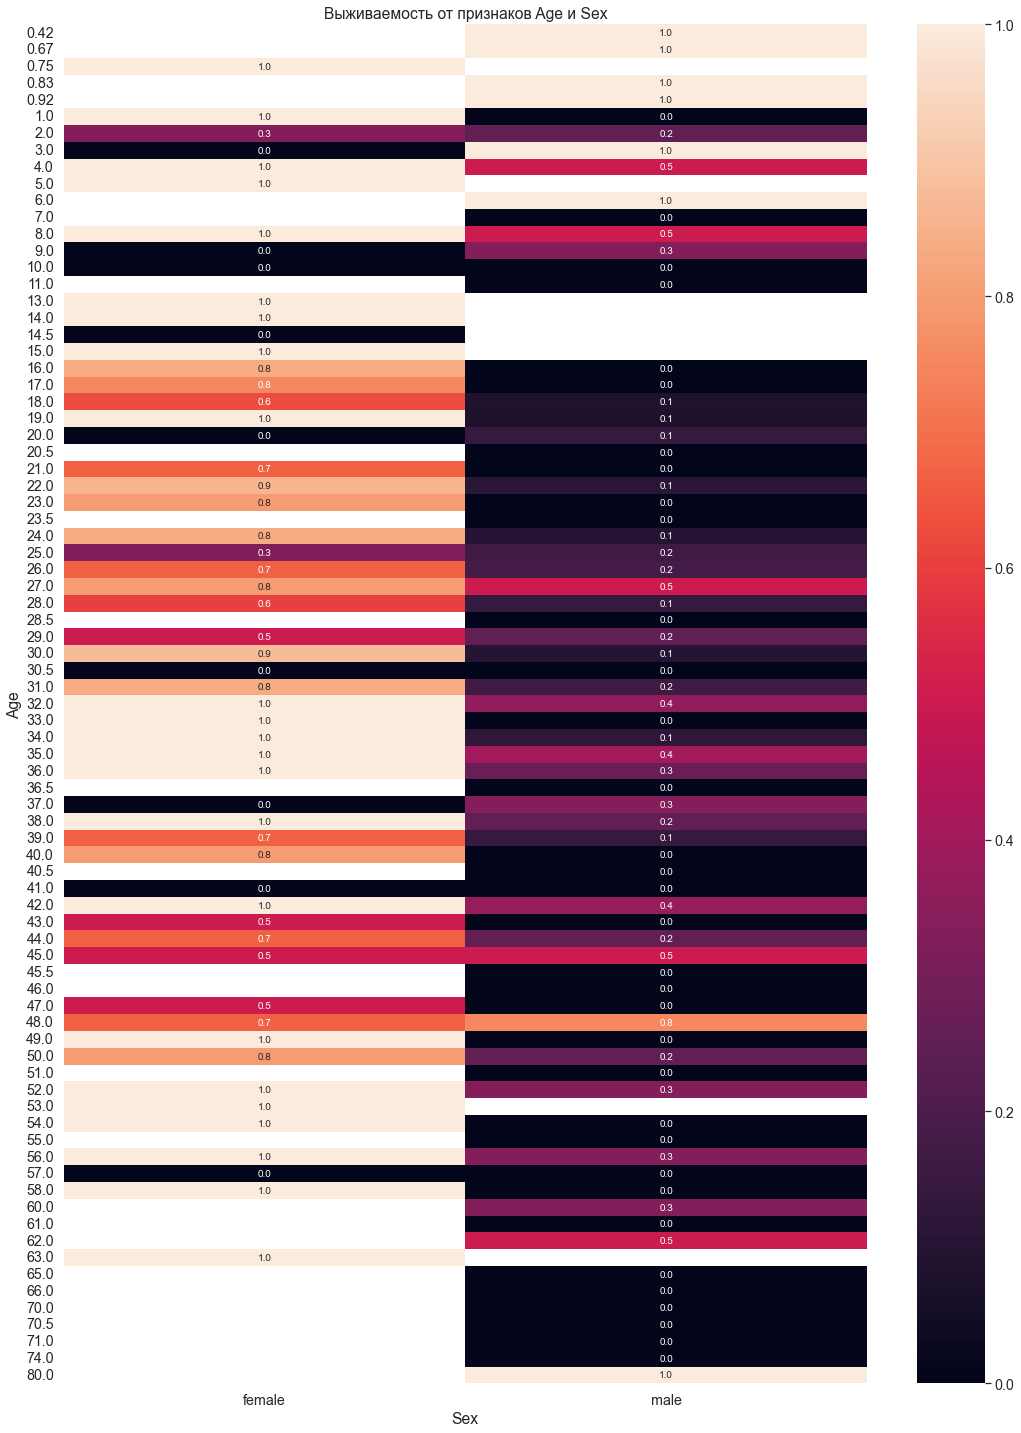

In [217]:
plt.figure(figsize=(18, 25))
ax = sns.heatmap(table, fmt=".1f", annot=True)
ax.set_title('Выживаемость от признаков Age и Sex')


In [220]:
def get_res3(x):
    if x['Sex'] == 'female':
        if x['Age'] not in [3, 9, 10, 14.5, 20, 30.5, 37, 41, 57]:
            x['Survived'] = 1
        else:
            x['Survived'] = 0
    else:
        if x['Age'] < 1 or x['Age'] in [3, 6, 48, 80]:
            x['Survived'] = 1
        else:
            x['Survived'] = 0
    return x

In [221]:
def tree3(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    predicted['Survived'] = 1
    predicted = features.apply(lambda x : get_res1(x), axis=1)
    return predicted

In [222]:
criteria(train_target, tree3(train_features)['Survived'])

0.7964743589743589

In [223]:
criteria(test_target, tree3(test_features)['Survived'])

0.48651685393258426

Как мы видим, изменений нет, значит, признак возраста и пола влияет также как и просто пол на выживаемость


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

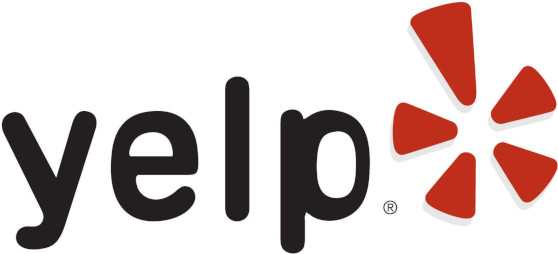

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [224]:
data = pd.read_csv('yelp_business.csv', index_col = 0)
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [225]:
data.groupby('city').count()['business_id'].sort_values(ascending=False).head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

Получили таблицу, поняли, что в Лас Вегасе больше всего компаний

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [226]:
data[data['city'] == 'Las Vegas']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping
...,...,...,...,...,...,...,...,...,...,...,...
174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""",Las Vegas,NV,89146,36.134355,-115.224462,1,Real Estate Services;Home Services;Property Ma...
174545,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""",Las Vegas,NV,89101,36.173589,-115.116779,1,Coffee & Tea;Food
174546,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Southwest,"""7325 S Rainbow Blvd, Ste 120""",Las Vegas,NV,89139,36.055130,-115.243488,1,Mobile Phone Accessories;Mobile Phones;Electro...
174552,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",Westside,"""3375 S Decatur Blvd, Ste 7""",Las Vegas,NV,89102,36.128780,-115.208990,1,Martial Arts;Sports Wear;Men's Clothing;Sporti...


Построим график без ограничений, поймем чем надо ограничить

<Figure size 648x288 with 0 Axes>

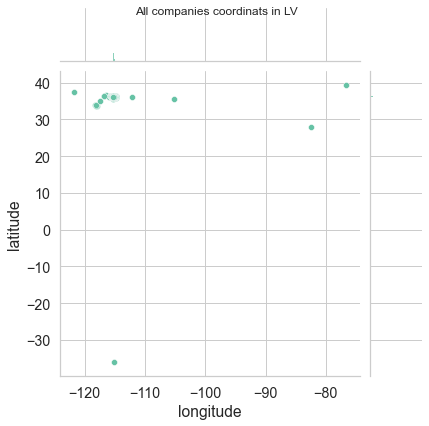

In [227]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    coords = data[data['city'] == 'Las Vegas']
    
    rel = sns.jointplot(data=coords, x='longitude', y="latitude")
    rel.fig.suptitle('All companies coordinats in LV')


Попробуем ограничить и увидеть закономерность

<Figure size 648x288 with 0 Axes>

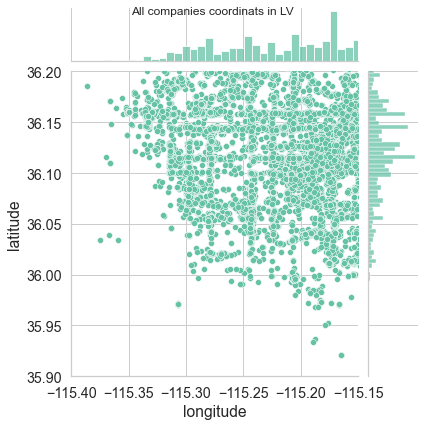

In [228]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 4))
    coords = data[data['city'] == 'Las Vegas']
    
    '''q = coords["longitude"].quantile(0.7)
    coords = coords[coords["longitude"] < q]

    q = coords["latitude"].quantile(0.7)
    coords = coords[coords["latitude"] < q]'''
    
    rel = sns.jointplot(data=coords, x='longitude', y="latitude", xlim = [-115.4, -115.15], ylim=[35.9, 36.2])#, ylim = [-20 20])
    rel.fig.suptitle('All companies coordinats in LV')


Ограничили плохо, пока закономерности не видно, попробуем увеличить график и чуть лучше масштабировать

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

*Замечание. Подгружать карту города в качестве фона графика мы научимся чуть позже.*

Text(0.5, 1.0, 'All companies coordinats in LV')

<Figure size 1296x576 with 0 Axes>

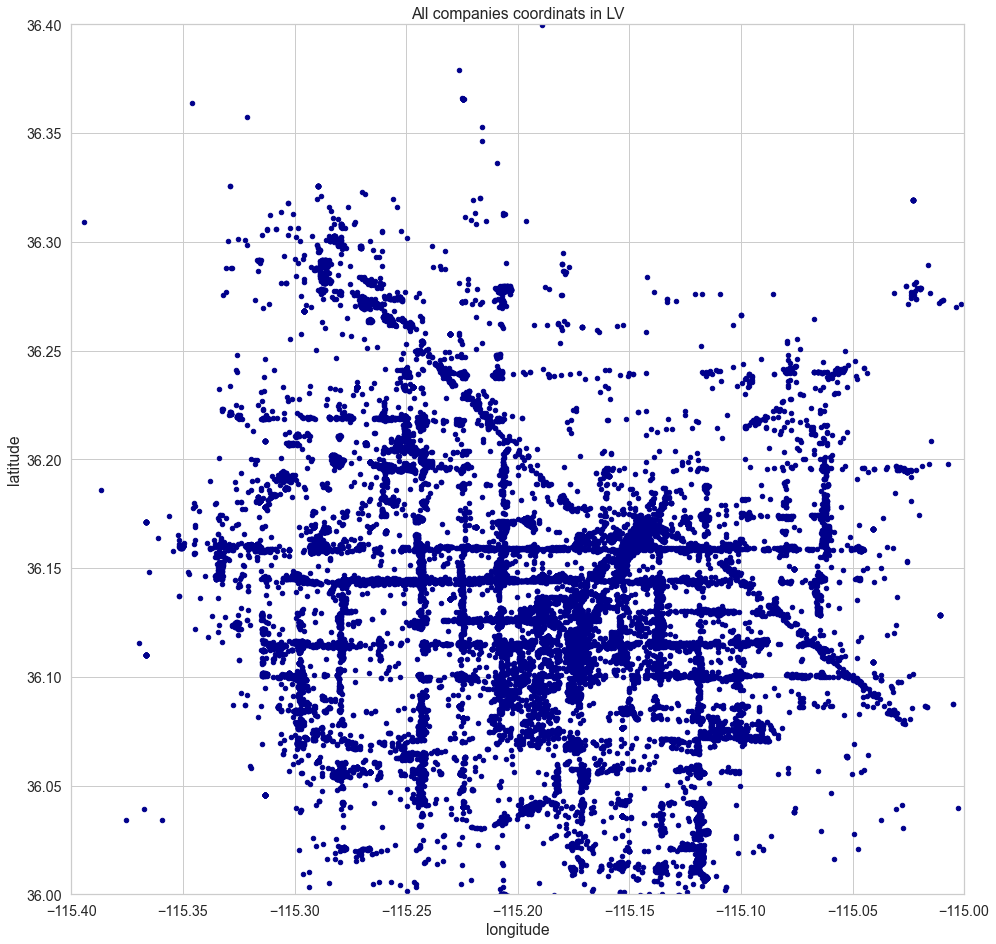

In [229]:
coords = data[data['city'] == 'Las Vegas']
plt.figure(figsize=(18, 8))
ax1 = coords.plot.scatter(x='longitude',
                          y='latitude',
                          c='DarkBlue',
                         figsize=(16,16))
ax1.set_xlim(-115.4, -115)
ax1.set_ylim(36, 36.4)
plt.title('All companies coordinats in LV')



Увеличили график, улучшили границы, теперь самый раз, видны границы кварталов, некоторые улицы, посмотрел на график Лас Вегаса, похоже

Теперь поймем, на каких улицах больше всего компаний, уберем выбросы, сгруппируем компании по адресам и отсортируем по количеству

In [230]:
coords = data[data['city'] == 'Las Vegas']
    
q = coords['longitude'].quantile(0.7)
coords = coords[coords["longitude"] < q]

q = coords['latitude'].quantile(0.7)
coords = coords[coords['latitude'] < q]
coords = coords[(coords['longitude'] > -115.40) & (coords['longitude'] < -115.15) & (coords['latitude'] > 35.90) & (coords['latitude'] < 36.2)]


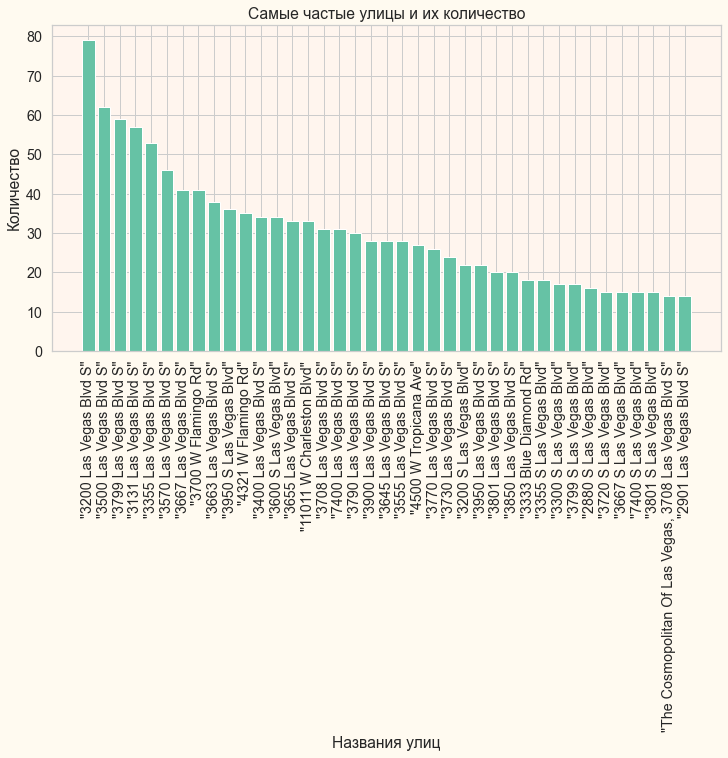

In [231]:
coords['count'] = 1
make_graphic_x = coords.groupby(by='address', as_index=False).count().sort_values(by='count', ascending=False)[:40]['address']
make_graphic_y = coords.groupby(by='address', as_index=False).count().sort_values(by='count', ascending=False)[:40]['count']
make_graphic_x = make_graphic_x[1:]
make_graphic_y = make_graphic_y[1:]

fig, ax = plt.subplots()

ax.bar(make_graphic_x, make_graphic_y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
plt.xticks(rotation=90)
plt.xlabel('Названия улиц')
plt.ylabel('Количество')
plt.title('Самые частые улицы и их количество')




plt.show()

По гистограмме можем сделать вывод, что улица с наибольшим числом компаний - Blvd S, Северный бульвар Лас Вегаса

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [232]:
data_stars = pd.read_csv('yelp_review.csv', index_col=0)
data_stars

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...
5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,EO3i5kTUG7_S2OIQ23sdSA,3


In [233]:
data

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
...,...,...,...,...,...,...,...,...,...,...,...
174562,ALV5R8NkZ1KGOZeuZl3u0A,"""Whitby Toyota""",NaN,"""1025 Dundas Street W""",Whitby,ON,L1P 1Z1,43.873460,-78.968033,1,Car Dealers;Automotive
174563,gRGalHVu6BcaUDIAGVW_xQ,"""Village Auto Body""",NaN,"""3957 Brecksville Rd""",Richfield,OH,44286,41.243385,-81.636212,1,Body Shops;Automotive
174564,XXvZBIHoJBU5d6-a-oyMWQ,"""AAM""",NaN,"""1600 W Broadway Rd, Ste 200""",Tempe,AZ,85282,33.407914,-111.965098,1,Home Services;Property Management;Real Estate
174565,lNpPGgM96nPIYM1shxciHg,"""Bronze Beauty Spray Tanning""",NaN,"""300 Camp Horne Rd, Ste 250""",Pittsburgh,PA,15202,40.517724,-80.091466,1,Spray Tanning;Tanning;Beauty & Spas


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [234]:
data_stars = data_stars.reset_index()
data_stars = data_stars.set_index('business_id')
data_stars_LV = data_stars.loc[data[data['city'] == 'Las Vegas']['business_id']]
data_stars_LV

,index,stars
business_id,,
kCoE3jvEtg6UVz5SOD3GVw,456053,4
kCoE3jvEtg6UVz5SOD3GVw,1093900,1
kCoE3jvEtg6UVz5SOD3GVw,2039047,5
kCoE3jvEtg6UVz5SOD3GVw,2979380,5
kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...
9ouC6BpmjFpLfHeQnLQqng,4857506,5
9ouC6BpmjFpLfHeQnLQqng,5256464,5
n9a-3YhibkMDUEgncIivHg,779637,5


Удалим колонку index

In [235]:
data_stars_LV = data_stars_LV.drop('index', 1)
data_stars_LV

,stars
business_id,
kCoE3jvEtg6UVz5SOD3GVw,4
kCoE3jvEtg6UVz5SOD3GVw,1
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
...,...
9ouC6BpmjFpLfHeQnLQqng,5
9ouC6BpmjFpLfHeQnLQqng,5
n9a-3YhibkMDUEgncIivHg,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [236]:
groupped = data_stars_LV.groupby(by='business_id').agg([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [237]:
groupped.columns = ['Средняя оценка', 'Количество оценок']
groupped

,Средняя оценка,Количество оценок
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [238]:
data_LV = data[data['city'] == 'Las Vegas']
data_LV = data_LV.set_index('business_id')

data_LV = data_LV.join(groupped)
data_LV = data_LV.rename(columns={'Средняя оценка': 'stars', 'Количество оценок': 'count'})
data_LV  = data_LV[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
data_LV

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.134355,-115.224462,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.173589,-115.116779,Coffee & Tea;Food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.055130,-115.243488,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",3.857143,35


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

Text(0.5, 1.0, 'All companies coordinats in LV')

<Figure size 1296x576 with 0 Axes>

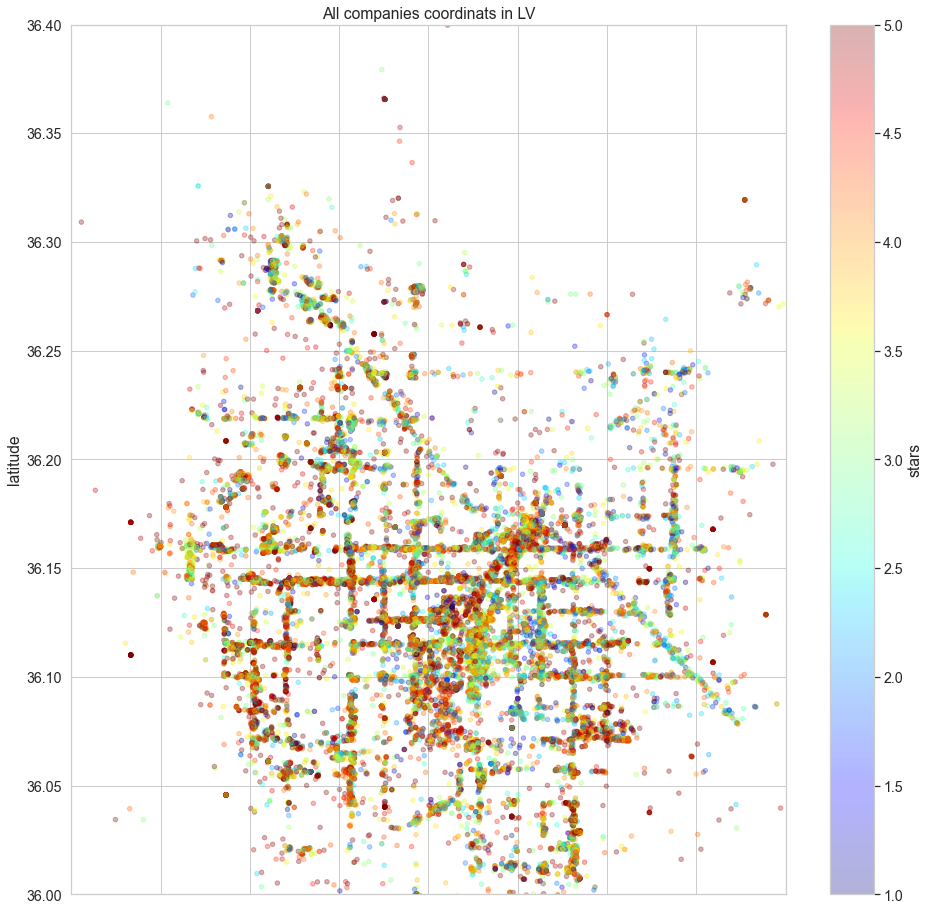

In [239]:
coords = data_LV
plt.figure(figsize=(18, 8))
ax1 = coords.plot.scatter(x='longitude',
                          y='latitude',
                          c='stars',
                          colormap='jet',
                          alpha=0.3,
                         figsize=(16,16))
ax1.set_xlim(-115.4, -115)
ax1.set_ylim(36, 36.4)
plt.title('All companies coordinats in LV')

Видим, что на графике больше всего компаний с высокими оценками в центре 

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [240]:
data_LV['longitude'] = np.round(data_LV['longitude']*10, decimals=1)*0.1
data_LV['latitude'] = np.round(data_LV['latitude']*10, decimals=1)*0.1


Text(0.5, 1.0, 'Все координаты районов компаний в Лас Вегасе')

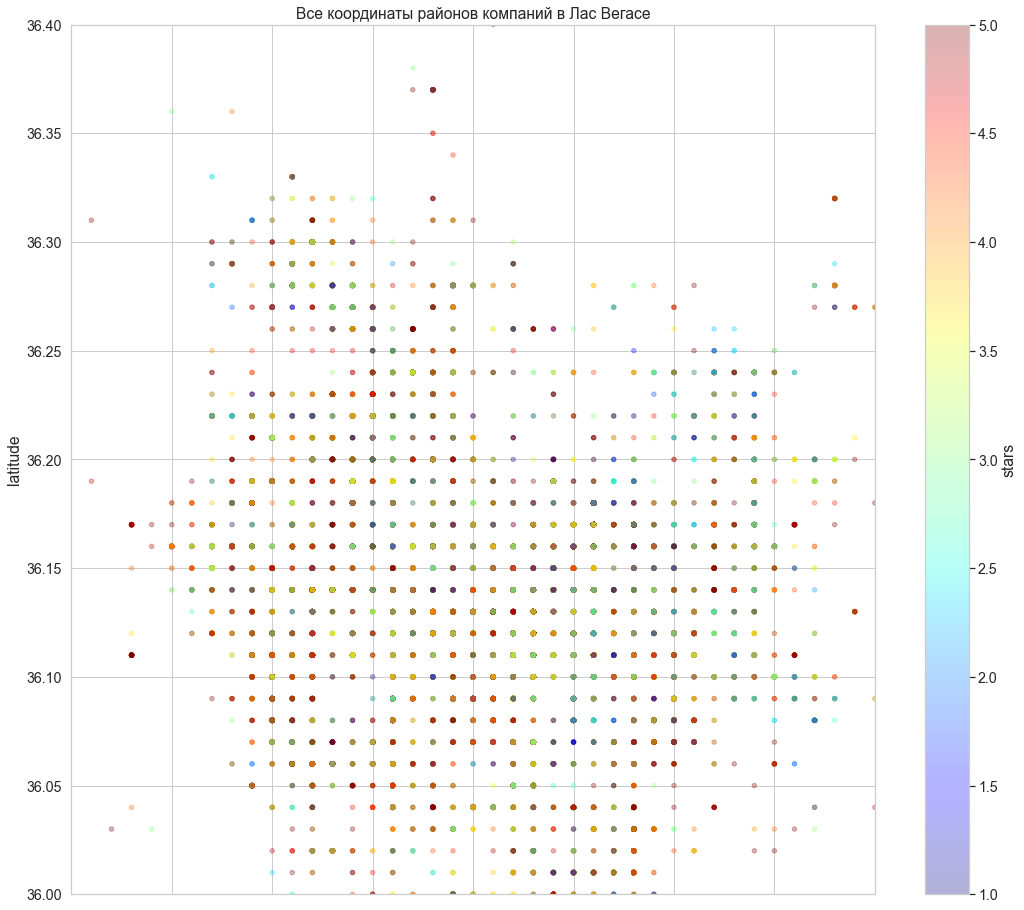

In [246]:
coords = data_LV
#plt.figure(figsize=(18, 8))
ax1 = coords.plot.scatter(x='longitude',
                          y='latitude',
                          c='stars',
                          colormap='jet',
                          alpha=0.3,
                         figsize=(18,16))
ax1.set_xlabel('longitude')
ax1.set_xlim(-115.4, -115)
ax1.set_ylim(36, 36.4)
plt.title('Все координаты районов компаний в Лас Вегасе')

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [247]:
table = pd.pivot_table(data_LV, values='stars', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)
table

longitude,-121.86,-118.25,-118.19,-118.07,-118.00,-117.50,-116.87,-116.78,-116.49,-115.98,...,-114.96,-114.94,-114.93,-114.90,-114.89,-114.80,-112.14,-105.23,-82.46,-76.62
latitude,,,,,,,,,,,,,,,,,,,,,
-36.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.303411,NaN
33.71,NaN,NaN,NaN,NaN,4.588235,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.77,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.81,NaN,NaN,NaN,3.928571,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.46,NaN,NaN,NaN,NaN,NaN,NaN,3.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.088889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


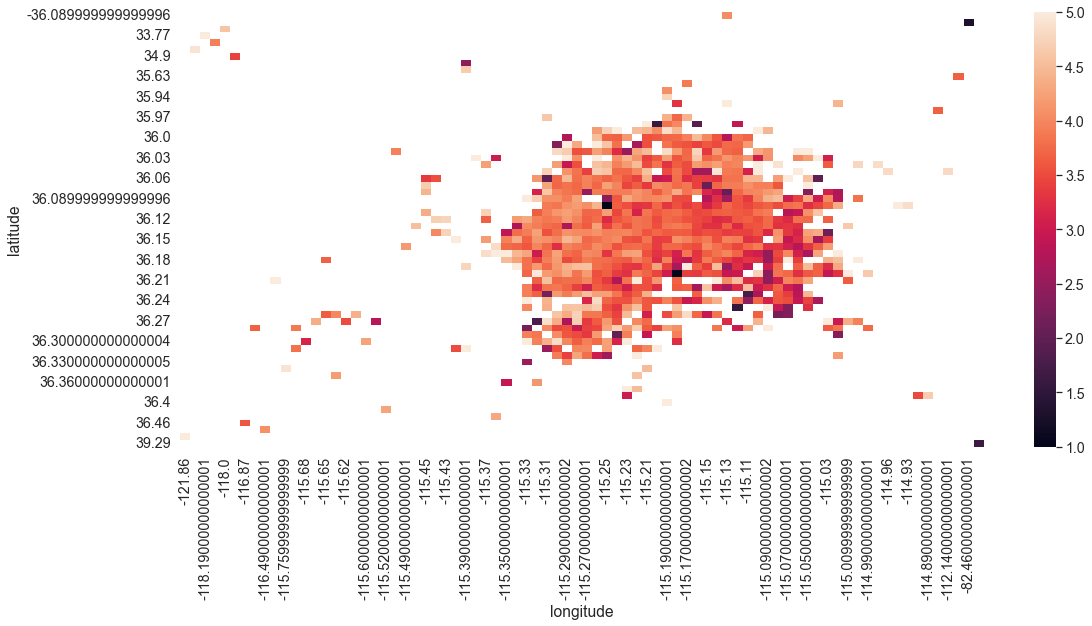

In [248]:
#table = table.fillna(0.0).astype(int)
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, fmt=".1f")


Уберем компании, находящиеся далеко от основного скопления и перестроим pivot и heatmap 

In [249]:
data_LV['longitude'] = data_LV[(-115.4 < data_LV['longitude']) & (data_LV['longitude'] < -115)]['longitude']
data_LV['latitude'] = data_LV[(36 < data_LV['latitude']) & (data_LV['latitude'] < 36.4)]['latitude']

In [250]:
table = pd.pivot_table(data_LV, values='stars', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)
table

longitude,-115.39,-115.38,-115.37,-115.36,-115.35,-115.34,-115.33,-115.32,-115.31,-115.30,...,-115.10,-115.09,-115.08,-115.07,-115.06,-115.05,-115.04,-115.03,-115.02,-115.01
latitude,,,,,,,,,,,,,,,,,,,,,
36.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800000,...,4.333333,4.143093,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,NaN
36.03,NaN,5.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,3.072727,4.111111,NaN,NaN,4.000000,4.233333,5.000000,3.083333,NaN,NaN
36.04,NaN,NaN,4.230769,NaN,NaN,NaN,NaN,NaN,NaN,4.208333,...,5.000000,NaN,4.893519,NaN,NaN,NaN,NaN,3.625000,NaN,NaN
36.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.709117,NaN,...,5.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
36.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.150000,1.968750,3.743839,...,4.443227,NaN,4.206790,5.000000,NaN,4.574321,1.983193,NaN,NaN,NaN
36.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.280808,3.714126,...,3.925283,3.928004,3.591860,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
36.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.111111,4.617260,3.964662,...,4.026069,4.157072,4.277778,NaN,NaN,2.345161,NaN,3.082769,2.720000,NaN
36.09,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.688406,4.073170,4.074933,...,3.948070,4.380952,4.500000,3.024126,3.411688,4.320707,3.013151,4.030159,2.777169,NaN


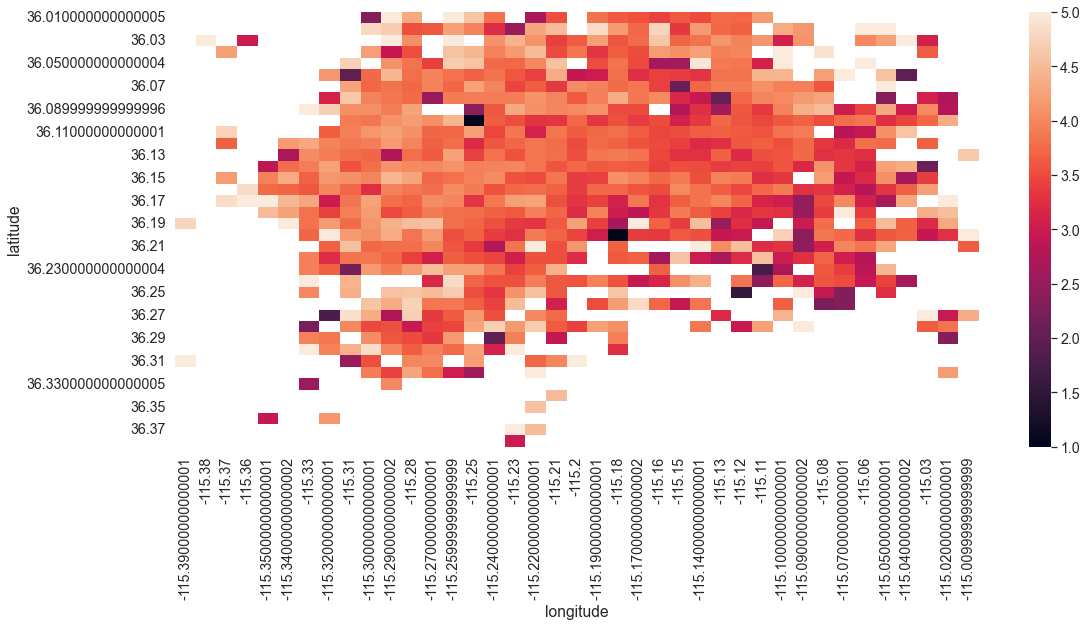

In [251]:
#table = table.fillna(0.0).astype(int)
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Если в районе мало компаний, то средняя оценка района зависит от маленького числа компаний, а значит может быть недостаточна объективна в силу маленького числа отзывов
Еще один минус - в `pivot table` очень много `nan`, которые непонятно чем заменять + на построенном `heatmap` `nan` - белым обозначен сливается с оценкой 5
Поэтому попробуем сменить другую цветовую гамму, не опирающуюся на смену оттенка, а опирающуюся на смену цвета, однако тогда отличий между близкими значениями средних оценок вообще не будет

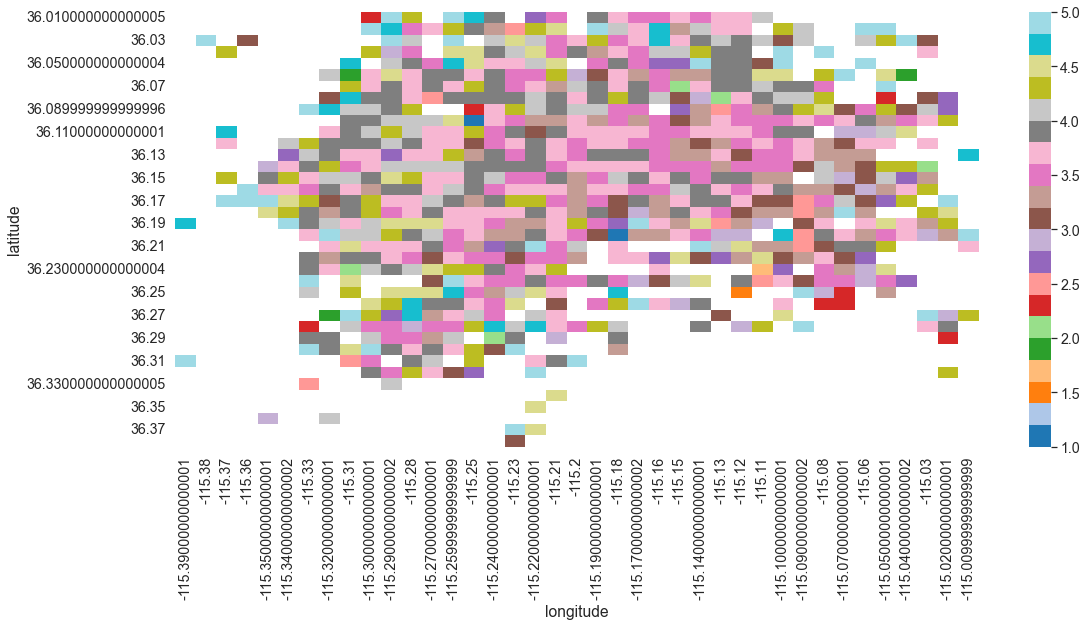

In [252]:
#table = table.fillna(0.0).astype(int)
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, cmap='tab20')

Зато теперь значения `nan` отличимы от всех остальных значений

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [253]:
data_LV_many = data_LV[data_LV['count'] >= 30]
table = pd.pivot_table(data_LV_many, values='stars', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)
table

longitude,-115.37,-115.35,-115.34,-115.33,-115.32,-115.31,-115.30,-115.29,-115.28,-115.27,...,-115.10,-115.09,-115.08,-115.07,-115.06,-115.05,-115.04,-115.03,-115.02,-115.01
latitude,,,,,,,,,,,,,,,,,,,,,
36.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.374053,3.435637,...,NaN,3.857457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.870229,NaN,...,NaN,NaN,NaN,NaN,NaN,4.233333,5.000000,NaN,NaN,NaN
36.04,4.230769,NaN,NaN,NaN,NaN,NaN,NaN,3.385542,4.114604,NaN,...,NaN,NaN,4.680556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.05,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,4.191186,3.665851,3.187816,...,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
36.06,NaN,NaN,NaN,NaN,NaN,NaN,3.070652,4.347911,3.604708,3.764468,...,4.803922,NaN,NaN,NaN,NaN,4.468750,NaN,NaN,NaN,NaN
36.07,NaN,NaN,NaN,NaN,NaN,4.409091,3.848236,4.027062,3.267892,3.712333,...,4.043594,4.069943,4.383721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.08,NaN,NaN,NaN,NaN,NaN,4.916667,3.961571,4.225525,3.769165,NaN,...,4.055952,3.454409,NaN,NaN,NaN,2.290323,NaN,2.768242,NaN,NaN
36.09,NaN,NaN,NaN,NaN,NaN,4.034455,4.205514,4.278544,4.837634,NaN,...,4.070016,NaN,NaN,NaN,4.030303,4.212121,3.370549,2.733333,3.219178,NaN


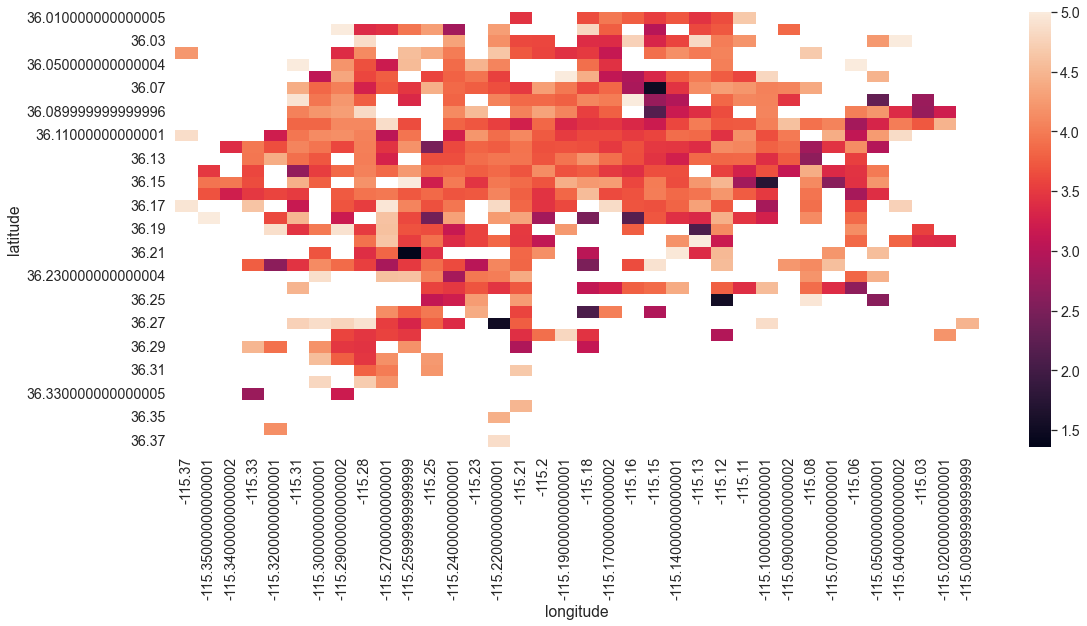

In [254]:
#table = table.fillna(0.0).astype(int)
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table)

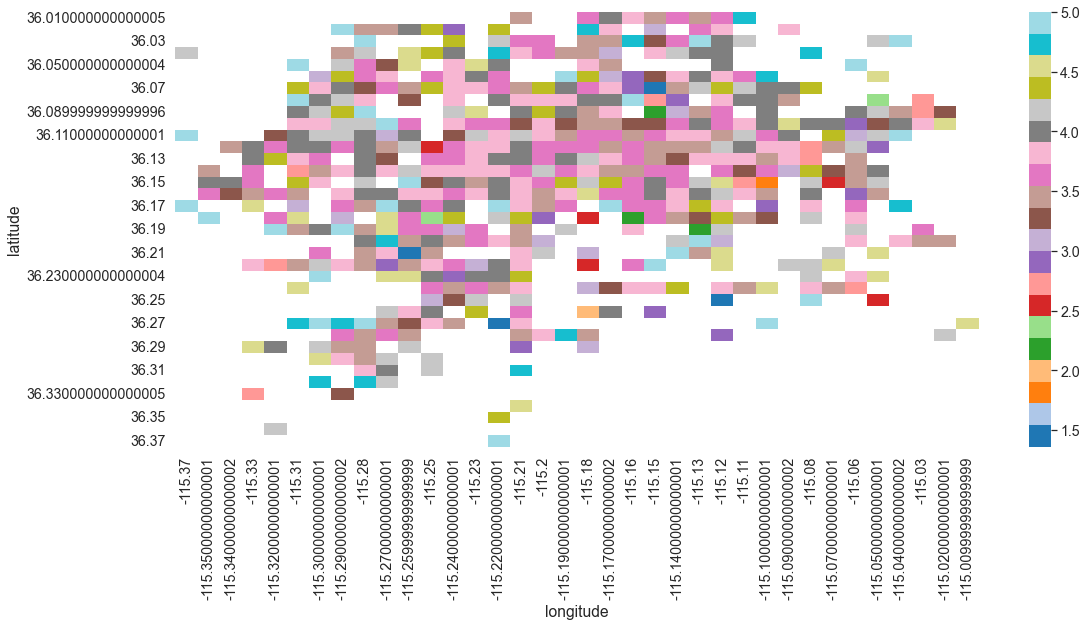

In [255]:
#table = table.fillna(0.0).astype(int)
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, cmap='tab20')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** на полученном графике заметно меньше нижних оценок и меньше верхних оценок, большинство оценок примерно посередине, около 3.5 +- 1балл, но стало больше пустых клеток, тк мы убрали некоторые районы из рассмотрения, теперь оценки более объективны

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [256]:
data_LV['categories'] = data_LV['categories'].str.lower()
data_LV

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.21,-115.27,real estate services;real estate;home services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.20,-115.25,shopping;sporting goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.09,-115.12,shopping;jewelry;watch repair;local services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.06,-115.27,home services;lighting fixtures & equipment;lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.11,-115.06,nurseries & gardening;home & garden;shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.13,-115.22,real estate services;home services;property ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.17,-115.12,coffee & tea;food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.06,-115.24,mobile phone accessories;mobile phones;electro...,"""Sprint Store""",3.857143,35


In [257]:
data_LV = data_LV[(data_LV['categories'].str.contains('restaurant')) & (data_LV['count'] >= 5)]
data_LV['count_restaurants'] = 1
data_LV

,latitude,longitude,categories,name,stars,count,count_restaurants
business_id,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,36.07,-115.17,nightlife;bars;barbeque;sports bars;american (...,"""Flight Deck Bar & Grill""",3.769231,13,1
4srfPk1s8nlm1YusyDUbjg,36.06,-115.12,fast food;restaurants;sandwiches,"""Subway""",2.666667,6,1
n7V4cD-KqqE3OXk0irJTyA,36.07,-115.18,arcades;arts & entertainment;gastropubs;restau...,"""GameWorks""",3.117479,349,1
Wpt0sFHcPtV5MO9He7yMKQ,36.13,-115.11,restaurants;fast food;burgers,"""McDonald's""",2.150000,20,1
W1Yr6c2XDx_RBjb6WsV-aQ,36.17,-115.19,restaurants;cafes;american (new);bars;nightlif...,"""Divine Cafe at the Springs Preserve""",4.050000,140,1
...,...,...,...,...,...,...,...
Kbbm6Vd5UdbP10dwjBghRw,36.04,-115.19,restaurants;fast food;burgers,"""In-N-Out Burger""",4.196078,255,1
UpW3jyJ3_kTG7oDSflwnMA,36.11,-115.23,restaurants;thai,"""Archi's Thai Kitchen""",3.994695,377,1
e2ApirIzYID9xIye0r_gKQ,36.27,-115.26,salad;breakfast & brunch;sandwiches;burgers;re...,"""Farmer Boys""",2.735955,178,1


Определим районы, в которых хотя бы 10 ресторанов

In [258]:
find_kol_restaurants = data_LV[['latitude', 'longitude', 'count_restaurants']]
find_kol_restaurants = find_kol_restaurants.groupby(by=['latitude', 'longitude']).sum()
find_kol_restaurants = find_kol_restaurants[find_kol_restaurants['count_restaurants'] >=10]
find_kol_restaurants

count_restaurants
latitude longitude                   
36.01    -115.15                   24
         -115.14                   24
         -115.12                   25
36.02    -115.27                   11
         -115.12                   67
...                               ...
36.27    -115.26                   17
36.28    -115.29                   20
         -115.21                   22
36.29    -115.29                   20
36.30    -115.28                   22

[174 rows x 1 columns]

И склеим таблицу с ресторанами с таблицей данных по колонкам широты и долготы

In [259]:
data_LV = data_LV.reset_index()
data_LV = data_LV.set_index(['latitude', 'longitude'])
#data_LV = data_LV.drop('count_restaurants')
#data_LV = data_LV.join(find_kol_restaurants)
data_LV['count_restaurants'] = find_kol_restaurants['count_restaurants']
data_LV = data_LV.dropna()
data_LV = data_LV[data_LV['count_restaurants'] >= 10]
data_LV

,,business_id,categories,name,stars,count,count_restaurants
latitude,longitude,,,,,,
36.07,-115.17,Pd52CjgyEU3Rb8co6QfTPw,nightlife;bars;barbeque;sports bars;american (...,"""Flight Deck Bar & Grill""",3.769231,13,13.0
36.06,-115.12,4srfPk1s8nlm1YusyDUbjg,fast food;restaurants;sandwiches,"""Subway""",2.666667,6,16.0
36.07,-115.18,n7V4cD-KqqE3OXk0irJTyA,arcades;arts & entertainment;gastropubs;restau...,"""GameWorks""",3.117479,349,34.0
36.13,-115.11,Wpt0sFHcPtV5MO9He7yMKQ,restaurants;fast food;burgers,"""McDonald's""",2.150000,20,15.0
36.01,-115.12,dPxZI9lrKTl5dvFfnb1_Ig,seafood;italian;pizza;restaurants,"""Trattoria Italia""",4.485714,210,25.0
...,...,...,...,...,...,...,...
36.09,-115.10,dizXpumQ-R5Py87nNUFy8A,sandwiches;restaurants;food;delis,"""Crisp Sandwich Company""",4.055556,18,10.0
36.04,-115.19,Kbbm6Vd5UdbP10dwjBghRw,restaurants;fast food;burgers,"""In-N-Out Burger""",4.196078,255,12.0
36.27,-115.26,e2ApirIzYID9xIye0r_gKQ,salad;breakfast & brunch;sandwiches;burgers;re...,"""Farmer Boys""",2.735955,178,17.0


Теперь мы получили в таблице только районы, в которых хотя бы 10 ресторанов с хотя бы 5ю отзывами

In [260]:
table = pd.pivot_table(data_LV, values='stars', index='latitude',
                    columns='longitude', aggfunc=np.mean)
table

longitude,-115.33,-115.32,-115.31,-115.30,-115.29,-115.28,-115.27,-115.26,-115.25,-115.24,...,-115.14,-115.13,-115.12,-115.11,-115.10,-115.09,-115.08,-115.07,-115.06,-115.03
latitude,,,,,,,,,,,,,,,,,,,,,
36.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.615774,NaN,3.712468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.02,NaN,NaN,NaN,NaN,NaN,NaN,3.063668,NaN,NaN,NaN,...,NaN,NaN,3.525915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.611537,NaN,3.590208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.722078,...,NaN,NaN,3.509059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.05,NaN,NaN,NaN,NaN,NaN,3.519553,NaN,NaN,NaN,3.489595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.06,NaN,NaN,NaN,NaN,NaN,3.392215,NaN,NaN,3.531646,3.386147,...,NaN,NaN,3.063932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.817682,...,NaN,NaN,3.825597,NaN,3.543559,NaN,NaN,NaN,NaN,NaN
36.08,NaN,NaN,NaN,3.933567,NaN,NaN,NaN,NaN,NaN,3.941969,...,2.613860,NaN,3.487593,NaN,4.280974,NaN,NaN,NaN,NaN,3.062309
36.09,NaN,NaN,NaN,3.574518,NaN,NaN,NaN,NaN,NaN,3.610713,...,2.854835,NaN,NaN,NaN,3.727438,NaN,NaN,NaN,NaN,NaN


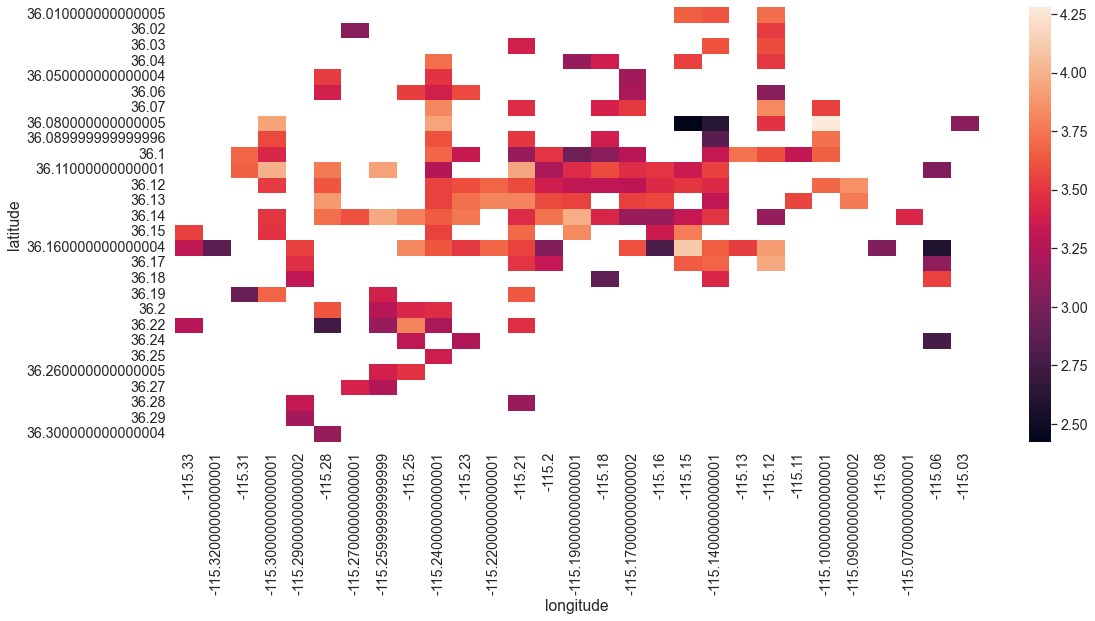

In [261]:
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table)

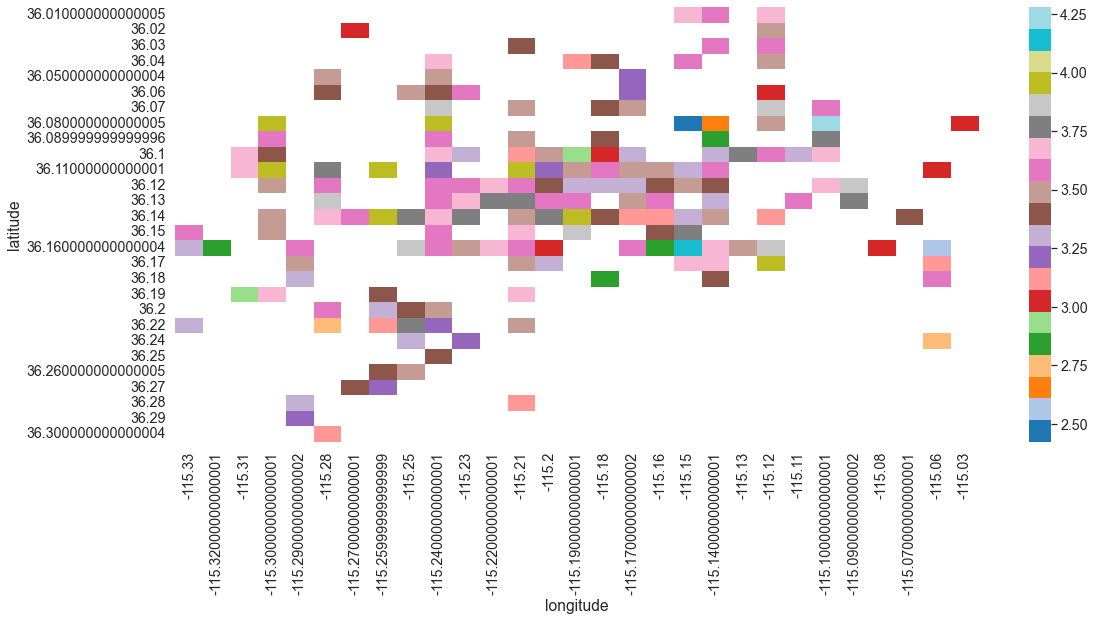

In [262]:
plt.figure(figsize=(18, 8))
ax = sns.heatmap(table, cmap='tab20')

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Такие ограничения сделаны, чтобы получать более объективную картину и минимизировать случайные плохие отзывы и случайные отличные отзывы, уменьшая их вклад в общую картину. Таким образом складывается более общее мнение о районе. Но также становится больше пропусков.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [263]:
data_LV = data[data['city'] == 'Las Vegas']
data_LV = data_LV.set_index('business_id')

data_LV = data_LV.join(groupped)
data_LV = data_LV.rename(columns={'Средняя оценка': 'stars', 'Количество оценок': 'count'})
data_LV  = data_LV[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]

data_LV['categories'] = data_LV['categories'].str.lower()
data_LV = data_LV[(data_LV['categories'].str.contains('restaurant')) & (data_LV['count'] >= 50)]

data_LV_cat = data_LV.sort_values(by='stars', ascending=False)[:10][['name', 'stars', 'count', 'latitude', 'longitude', 'categories']]

data_LV_cat = data_LV_cat.reset_index()
data_LV_cat = data_LV_cat.drop('business_id', 1)

data_LV_cat

,name,stars,count,latitude,longitude,categories
0,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,food tours;restaurants;event planning & servic...
1,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,restaurants;burgers;food stands;sandwiches;hot...
2,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,vietnamese;bubble tea;sandwiches;food;coffee &...
3,"""Garden Grill""",4.868132,91,36.166783,-115.286197,tacos;street vendors;farmers market;vegetarian...
4,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,cafes;tea rooms;food;bubble tea;restaurants;de...
5,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,food stands;hot dogs;caterers;restaurants;amer...
6,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,restaurants;breakfast & brunch;cafes
7,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,caterers;mexican;restaurants;food;event planni...
8,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,adult entertainment;lounges;hookah bars;restau...
9,"""California Sushi Burrito""",4.807018,57,36.125636,-115.202487,asian fusion;fast food;restaurants;japanese;po...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

Text(0.5, 1.0, 'All top companies coordinats in LV')

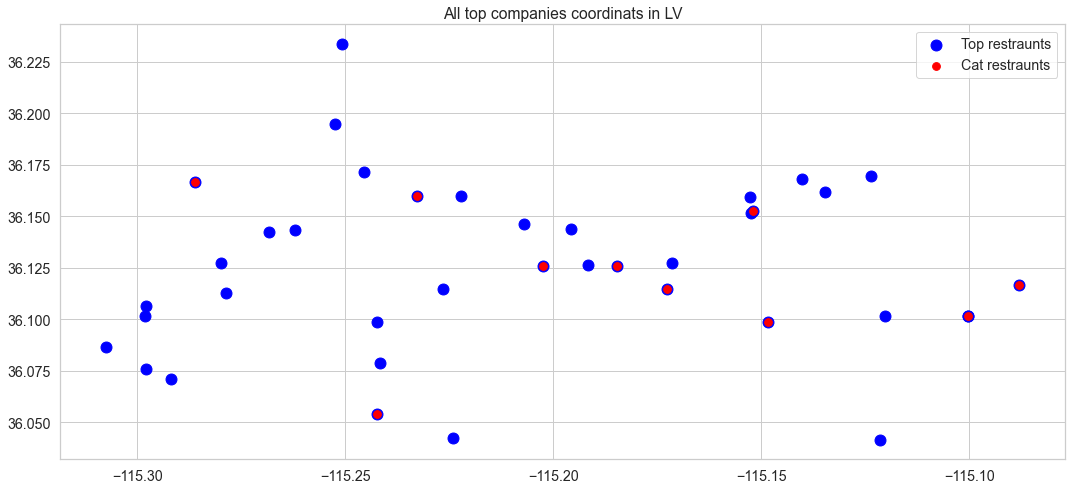

In [264]:
data_LV = data[data['city'] == 'Las Vegas']
data_LV = data_LV.set_index('business_id')

data_LV = data_LV.join(groupped)
data_LV = data_LV.rename(columns={'Средняя оценка': 'stars', 'Количество оценок': 'count'})
data_LV  = data_LV[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]

data_LV['categories'] = data_LV['categories'].str.lower()
data_LV = data_LV[(data_LV['categories'].str.contains('restaurant')) & (data_LV['count'] >= 50) & (data_LV['stars'] >= 4.7)]


coords = data_LV
plt.figure(figsize=(18, 8))
plt.scatter(coords['longitude'], coords['latitude'], s=120, c='b', label='Top restraunts')
plt.scatter(data_LV_cat['longitude'], data_LV_cat['latitude'], s=60, c='r', label='Cat restraunts') 
plt.legend()
'''ax1 = coords.plot.scatter(x='longitude',
                          y='latitude',
                          c='DarkBlue')
ax1.append(data_LV_cat.plot.scatter(x='longitude',
                         y='latitude',
                              c='red'))'''

#ax1.set_xlim(-115.4, -115)
#ax1.set_ylim(36, 36.4)
plt.title('All top companies coordinats in LV')

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <br>
Все рестораны, в которых питается кот расположены, как бы, в виде креста, можно сказать, что иногда он ходит с севера на юг, а иногда с запада на восток в рестораны и всегда проходит через центр города.<br>
Если сравнить эту карту с предыдущими, то получим, что все эти рестораны с высокими оценками находятся в центре города.<br>

Общий вывод по задаче - это город Лас Вегас, если компания имеет высокий рейтинг, то она скорее находится в центре города.<br>
Улица с наибольшим числом компаний, почти 100, - Blvd S, Северный бульвар Лас Вегаса